In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 176. AdaBoost Coding Part One - The Data

In [2]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


<Axes: xlabel='class', ylabel='count'>

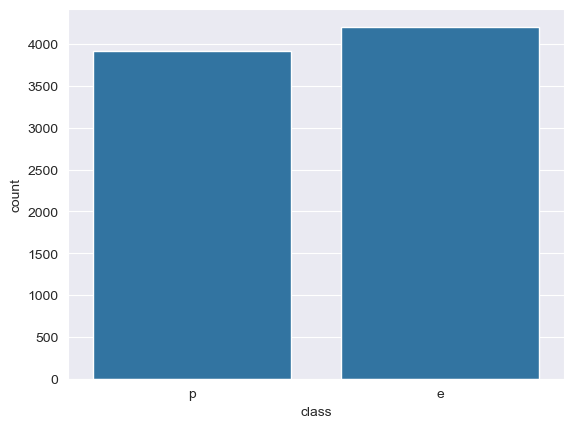

In [4]:
sns.countplot(x='class',data=df)

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

<Axes: xlabel='unique', ylabel='index'>

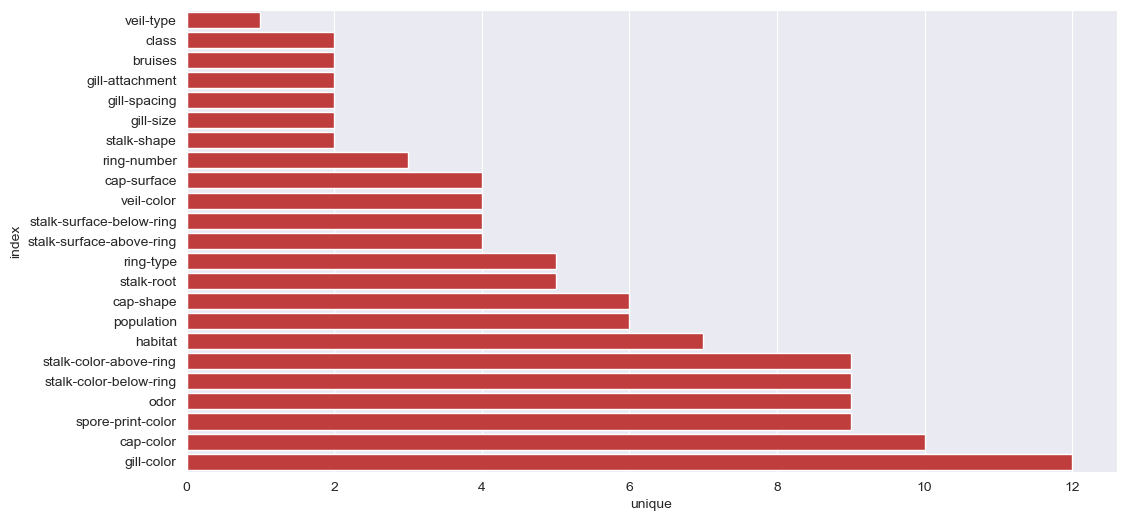

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(x='unique',y='index',data=feat_uni, color=sns.color_palette()[3])

In [8]:
X = df.drop('class',axis=1)

In [9]:
y = df['class']

In [10]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
X = pd.get_dummies(X, drop_first=True)

In [12]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# 177. AdaBoost Coding Part Two - The Model

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
model = AdaBoostClassifier(n_estimators=1, algorithm='SAMME')

In [17]:
model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=1)

In [18]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [19]:
predictions = model.predict(X_test)

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [21]:
accuracy_score(y_test,predictions)

0.8777686628383922

In [22]:
confusion_matrix(y_test,predictions, labels=['e','p'])

array([[529, 126],
       [ 23, 541]], dtype=int64)

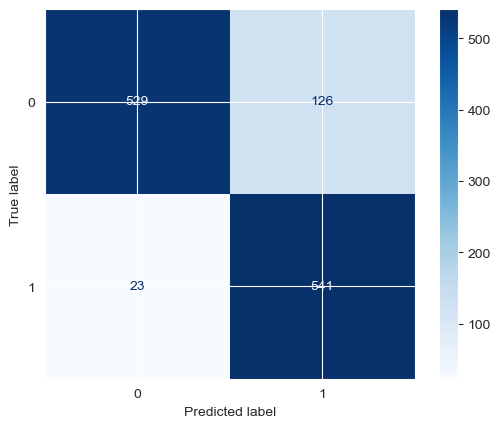

In [23]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions)).plot(cmap='Blues')

In [24]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
model.feature_importances_.argmax()

22

In [26]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

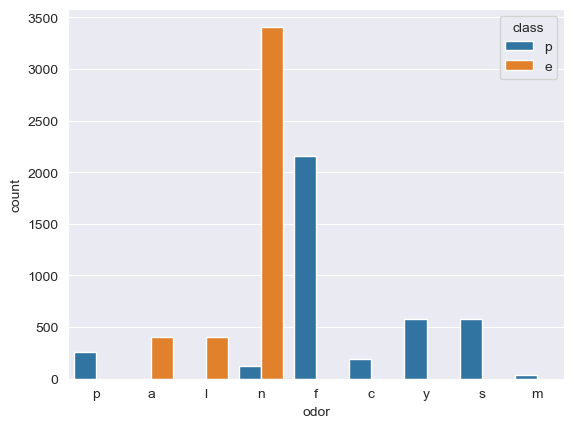

In [27]:
sns.countplot(x='odor',data=df, hue='class')

In [28]:
len(X.columns)

95

In [29]:
error_rates = []

for n in range(1,100):
    model = AdaBoostClassifier(n_estimators=n, algorithm='SAMME')
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    error_rates.append(err)

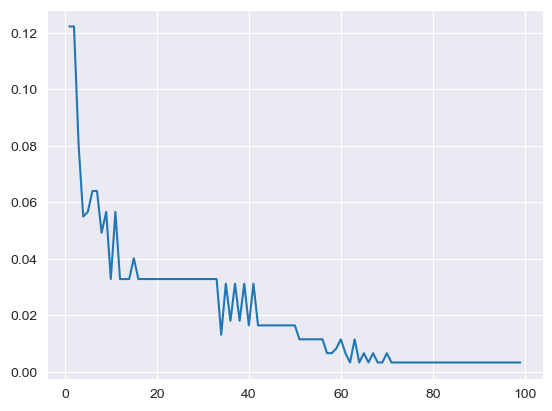

In [30]:
plt.plot(range(1,100),error_rates)

In [31]:
model

AdaBoostClassifier(algorithm='SAMME', n_estimators=99)

In [32]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0839286 , 0.14837301,
       0.03159851, 0.        , 0.07280025, 0.08196834, 0.        ,
       0.        , 0.        , 0.01388889, 0.0605164 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02166971, 0.        , 0.01879133, 0.        , 0.        ,
       0.03973033, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0356175 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02248036, 0.        , 0.     

In [33]:
features = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [34]:
features

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [35]:
imp_feats = features[features['Importance'] > 0]

In [36]:
imp_feats

,Importance
odor_c,0.083929
odor_f,0.148373
odor_l,0.031599
odor_n,0.072800
odor_p,0.081968
gill-spacing_w,0.013889
gill-size_n,0.060516
stalk-shape_t,0.021670
stalk-root_c,0.018791
stalk-surface-above-ring_k,0.039730


<Axes: xlabel='Importance', ylabel='None'>

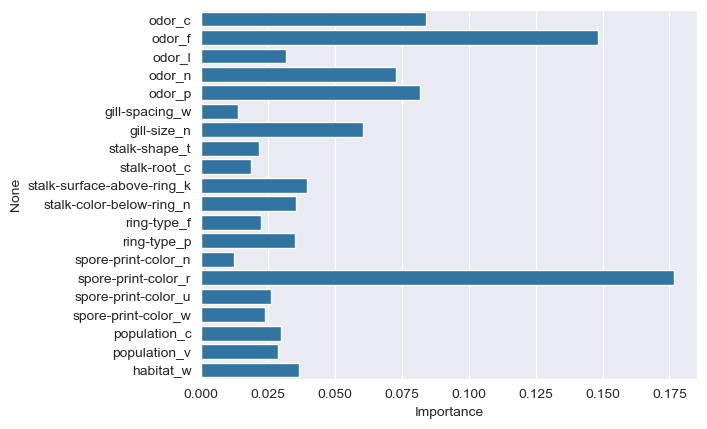

In [37]:
sns.barplot(x='Importance',y=imp_feats.index,data=imp_feats)

# 178. Gradient Boosting Theory

# 179. Gradient Boosting Coding Walkthrough

In [38]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [39]:
X = df.drop('class',axis=1)

In [40]:
y = df['class']

In [41]:
X = pd.get_dummies(X, drop_first=True)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {'n_estimators':[50,100],
              'learning_rate':[0.1,0.05,0.02],
              'max_depth':[3,4,5]}

In [47]:
gb_model = GradientBoostingClassifier()

In [48]:
grid = GridSearchCV(gb_model,param_grid, n_jobs=-1)

In [49]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.02],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [50]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [51]:
predictions = grid.predict(X_test)

In [52]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [53]:
grid.best_estimator_

GradientBoostingClassifier()

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



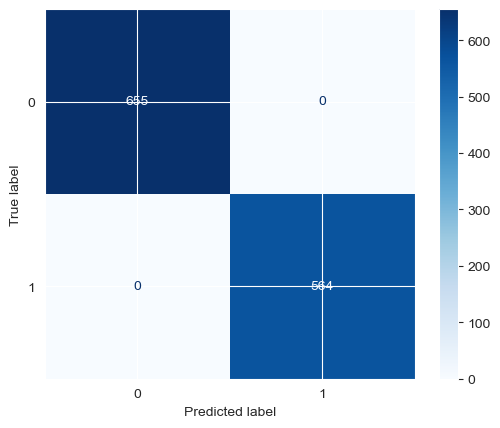

In [55]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions)).plot(cmap='Blues')

In [56]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 4.16034820e-17, 0.00000000e+00, 0.00000000e+00,
       8.28994850e-17, 1.04652037e-03, 6.28508749e-18, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 4.13968681e-17, 0.00000000e+00,
       5.39160706e-17, 0.00000000e+00, 0.00000000e+00, 3.34879058e-08,
       2.42083431e-03, 5.20501896e-02, 6.24175887e-04, 2.12277187e-02,
       1.82499853e-02, 4.36046854e-03, 6.14762854e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.29231264e-02,
       1.08044529e-02, 0.00000000e+00, 1.31689701e-16, 0.00000000e+00,
       2.53385114e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.54182573e-16, 0.00000000e+00, 1.43154750e-17, 1.03070960e-18,
       0.00000000e+00, 4.59787330e-06, 1.35970429e-01, 7.71855052e-03,
       2.45247958e-02, 4.65375385e-04, 6.12113083e-06, 6.53890008e-05,
       0.00000000e+00, 2.53703491e-04, 4.17464606e-02, 2.81236648e-06,
       0.00000000e+00, 0.00000000e+00, 6.76478844e-04, 0.00000000e+00,
      

In [57]:
features = pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])

In [58]:
imp_feats = features[features['Importance'] > 0.0005]

In [59]:
imp_feats

,Importance
cap-surface_g,0.001047
cap-color_y,0.002421
bruises_t,0.052050
odor_c,0.000624
odor_f,0.021228
odor_l,0.018250
odor_m,0.004360
odor_n,0.614763
odor_p,0.000921
gill-spacing_w,0.012923


<Axes: xlabel='Importance', ylabel='None'>

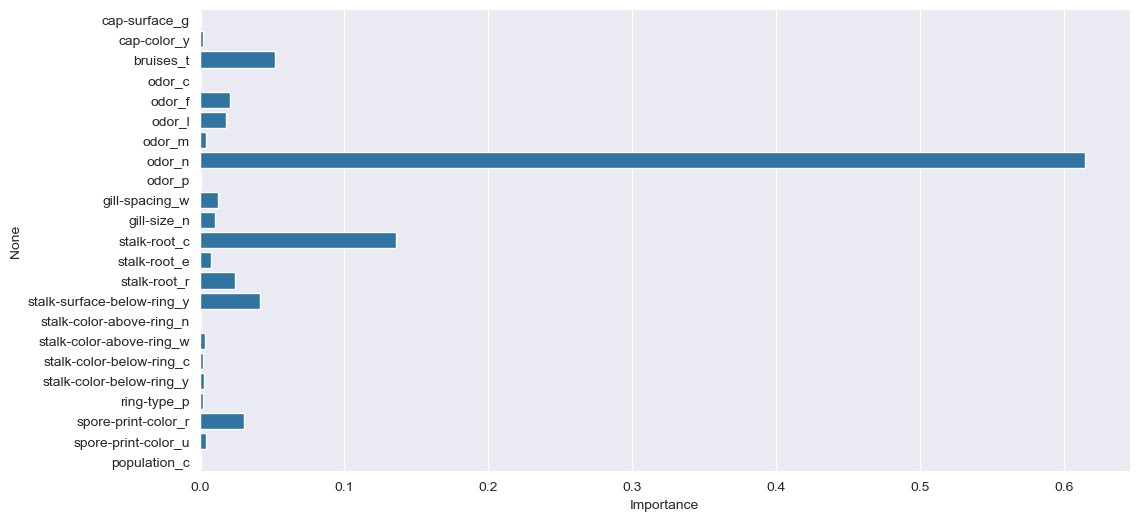

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x='Importance',y=imp_feats.index,data=imp_feats)